# When Point Estimates Fail: Visualizing Uncertainty in Noisy Regression

This notebook presents a minimal experimental study comparing ordinary least squares
(point estimates) with Bayesian Ridge Regression (uncertainty-aware inference) under
different noise and data sparsity regimes.


## Problem Setup

We consider data generated from the model:

y = 3x + ε  
ε ~ N(0, σ²),   x ~ U(-5, 5)

Three regimes are studied:
1. Low noise, dense data
2. High noise, dense data
3. High noise, sparse data


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, BayesianRidge


In [2]:
np.random.seed(42)


## Data Generation

Synthetic data are generated to control noise magnitude and sample sparsity explicitly.


In [3]:
def generate_data(N, sigma):
    x = np.random.uniform(-5, 5, size=N)
    epsilon = np.random.normal(0, sigma, size=N)
    y = 3 * x + epsilon
    return x.reshape(-1, 1), y


In [4]:
# Case 1: Low noise, dense
x1, y1 = generate_data(N=100, sigma=0.5)

# Case 2: High noise, dense
x2, y2 = generate_data(N=100, sigma=3.0)

# Case 3: High noise, sparse
x3, y3 = generate_data(N=15, sigma=3.0)


## Raw Data Visualization

We first inspect the data before fitting any model.


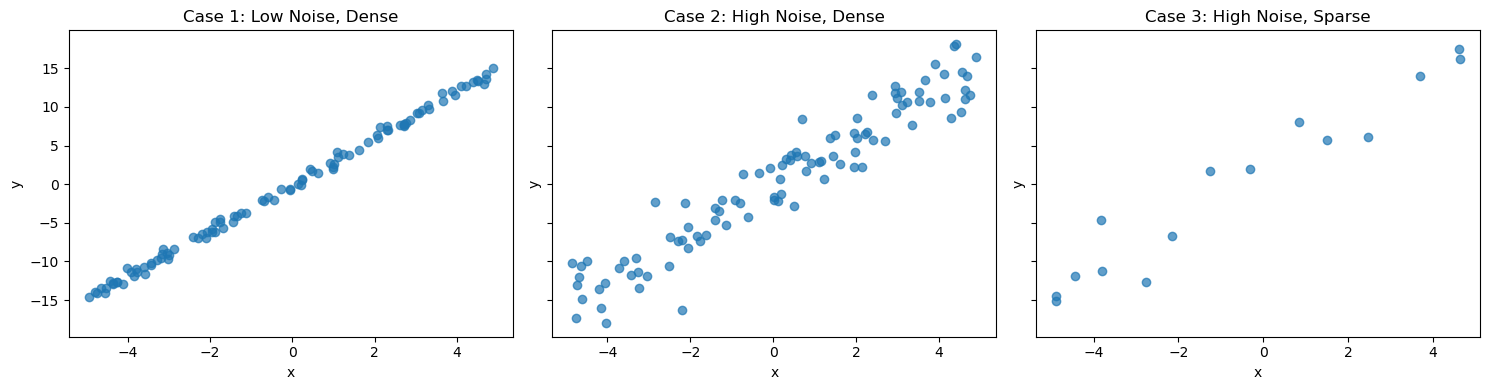

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

cases = [
    (x1, y1, "Case 1: Low Noise, Dense"),
    (x2, y2, "Case 2: High Noise, Dense"),
    (x3, y3, "Case 3: High Noise, Sparse")
]

for ax, (x, y, title) in zip(axes, cases):
    ax.scatter(x, y, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.tight_layout()
plt.show()



## Step 3: Ordinary Least Squares (Point Estimates)

OLS fits a single best line to the data but provides no explicit measure of uncertainty.


In [6]:
x_grid = np.linspace(-5, 5, 200).reshape(-1, 1)


In [7]:
def plot_ols(x, y, title):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x_grid)

    plt.scatter(x, y, alpha=0.7)
    plt.plot(x_grid, y_pred, linewidth=2)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    


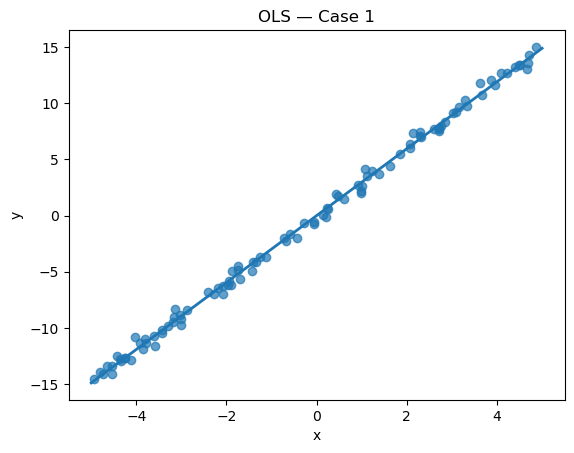

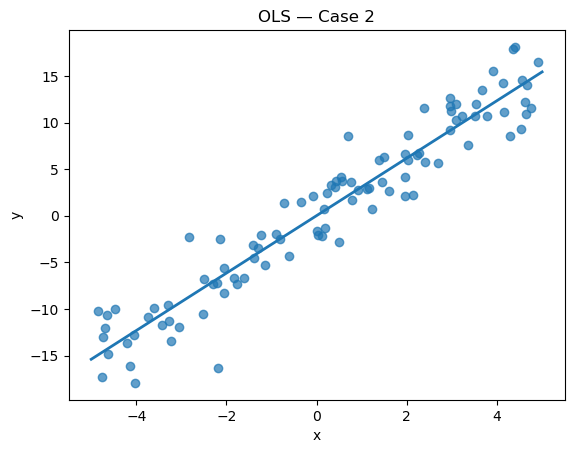

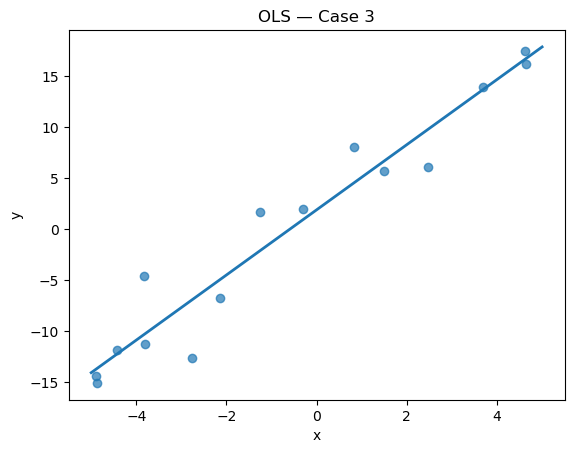

In [8]:
plot_ols(x1, y1, "OLS — Case 1")
plot_ols(x2, y2, "OLS — Case 2")
plot_ols(x3, y3, "OLS — Case 3")


## Step 4: Bayesian Ridge Regression

Bayesian inference treats model parameters as uncertain and yields a predictive
distribution rather than a single point estimate.



In [9]:
def plot_bayesian(x, y, title):
    model = BayesianRidge()
    model.fit(x, y)

    y_mean, y_std = model.predict(x_grid, return_std=True)

    plt.scatter(x, y, alpha=0.7)
    plt.plot(x_grid, y_mean, linewidth=2)
    plt.fill_between(
        x_grid.ravel(),
        y_mean - 2 * y_std,
        y_mean + 2 * y_std,
        alpha=0.3
    )
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


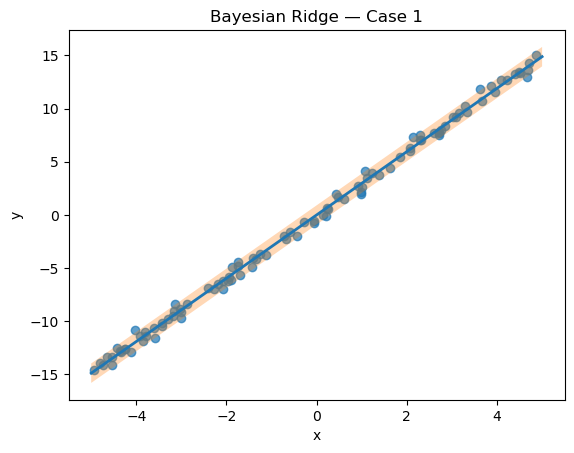

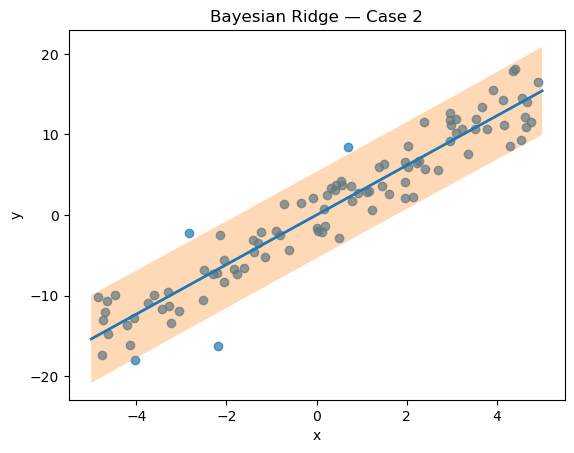

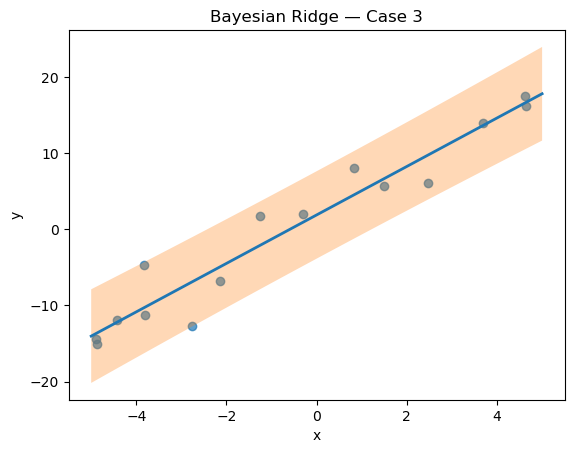

In [10]:
plot_bayesian(x1, y1, "Bayesian Ridge — Case 1")
plot_bayesian(x2, y2, "Bayesian Ridge — Case 2")
plot_bayesian(x3, y3, "Bayesian Ridge — Case 3")


## OLS vs Bayesian Comparison (Sparse Case)

This comparison highlights how point estimates can appear confident even when
uncertainty is large.


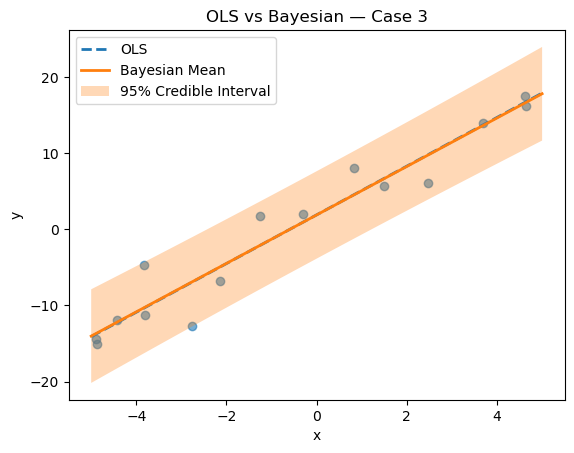

In [11]:
def plot_comparison(x, y, title):
    ols = LinearRegression().fit(x, y)
    bayes = BayesianRidge().fit(x, y)

    y_ols = ols.predict(x_grid)
    y_mean, y_std = bayes.predict(x_grid, return_std=True)

    plt.scatter(x, y, alpha=0.6)
    plt.plot(x_grid, y_ols, linestyle="--", linewidth=2, label="OLS")
    plt.plot(x_grid, y_mean, linewidth=2, label="Bayesian Mean")
    plt.fill_between(
        x_grid.ravel(),
        y_mean - 2 * y_std,
        y_mean + 2 * y_std,
        alpha=0.3,
        label="95% Credible Interval"
    )
    plt.legend()
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

plot_comparison(x3, y3, "OLS vs Bayesian — Case 3")



## Key Observations

Although ordinary least squares and Bayesian regression often agree on the mean
prediction, Bayesian inference explicitly quantifies uncertainty arising from noise
and data sparsity. In sparse, high-noise regimes, uncertainty dominates despite a
well-defined point estimate, illustrating the limitations of point-based inference.
